# Równoważenia obciążenia przez alokację shardów

Inicjalizacja środowiska

In [1]:
import pprint
import operator
import numpy as np
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=1, width=140)

Inicjalizacja wektora obciążeń poszczególnych shardów (F)

In [2]:
np.random.seed(23456789)

F_baze = np.random.randint(0,9, size=(250, 100))
pp.pprint(F_baze)
print(np.array(F_baze).shape)

array([[6, 6, 2, ..., 8, 8, 7],
       [6, 2, 1, ..., 4, 8, 0],
       [1, 8, 0, ..., 0, 8, 2],
       ...,
       [0, 0, 8, ..., 1, 1, 6],
       [8, 4, 7, ..., 2, 8, 1],
       [2, 0, 3, ..., 6, 7, 8]])
(250, 100)


Wyznaczenie ilości węzłów chmury (n)

In [3]:
n = 30

Wyznaczenie sumarycznego wektora obciążenia całej chmury

In [4]:
wts = list(map(sum, zip(*F_baze)))

Wyznaczenie względnego obciążenia przypadającego na jeden węzeł chmury

In [5]:
nwts = sum(list(wts))

Sortowanie względem modułu

In [6]:
F=sorted([x * n for x in F_baze],key=sum, reverse=True)

Alokowanie wektorów shardów względem posortowanego obciążenia

In [7]:
N = [[0 for y in F[x]] for x in range(0, n)]
R1 = [[0 for y in F[x]] for x in range(0, n)]

for R1_index, shard in enumerate(F):
    abs1 = sum(list(map(abs,list(map(operator.sub, wts,shard)))))
    maxValue = None
    maxNodeIndex = None

    for index, node in enumerate(N):
        
        if(sum(node) >= nwts):
            continue
            
        temp = [node,shard]
        abs2 =  sum(list(map(abs,map(operator.sub, wts, [sum(x) for x in zip(*temp)]))))
        value=abs2-abs1
        
        if(maxValue is None or value > maxValue):
            maxValue=value
            maxNodeIndex=index
    
    # suma dwoch wektorow
    N[maxNodeIndex]=list(map(operator.add, N[maxNodeIndex], list(shard)))
    
    # przydzielanie shardow losowe
    R1[R1_index%n]=list(map(operator.add, R1[R1_index%n], list(shard)))
    

#powrocenie do zmniejszonej o n 
N=[[x/n for x in f] for f in N]
R1=[[x/n for x in f] for f in R1]

Określenie średniej mocy chmury

In [8]:
power = 25

Wyznaczenie średniego obciążenia w czasie każdego węzła chmury(algorytm)

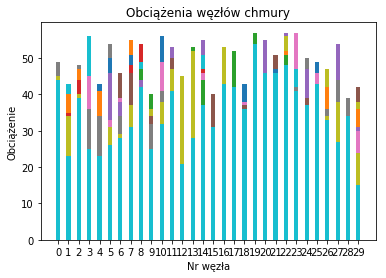

In [9]:
width = 0.4
Narray = np.transpose(np.array(N))

ind = np.arange(n)
for index, value in enumerate(N):
    plt.bar(range(0,n ), list(Narray[index]), width)
    
plt.xlabel("Nr węzła")
plt.ylabel("Obciążenie")
plt.xticks(range(0,n))
plt.title("Obciążenia węzłów chmury")
plt.show()

Wyznaczenie średniego obciążenia w czasie każdego węzła chmury(losowy przydzial)

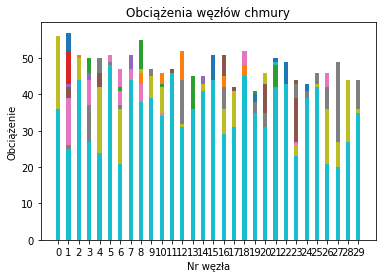

In [10]:
width = 0.4
Narray = np.transpose(np.array(R1))

ind = np.arange(n)
for index, value in enumerate(R1):
    plt.bar(range(0,n ), list(Narray[index]), width)
    
plt.xlabel("Nr węzła")
plt.ylabel("Obciążenie")
plt.xticks(range(0,n))
plt.title("Obciążenia węzłów chmury")
plt.show()

Wyznaczenie średniego przeciążenia każdego węzła chmury

In [11]:
loadN = list()
for node in N:
    nodeLoad = 0
    for index, value in enumerate(node):
        load = value-power
        if(load > 0):
            if(index < len(node)-1):
                node[index+1] += load
            nodeLoad += load
        
    loadN.append(nodeLoad)

pp.pprint(loadN)

[54317.0,
 15909.0,
 55558.0,
 55848.0,
 17534.0,
 53127.0,
 19260.0,
 54896.0,
 52999.0,
 16111.0,
 60081.0,
 59644.0,
 14570.0,
 54367.0,
 52178.0,
 17780.0,
 55878.0,
 53276.0,
 15258.0,
 54799.0,
 51995.0,
 52090.0,
 58260.0,
 53039.0,
 49750.0,
 53552.0,
 20152.0,
 55583.0,
 15495.0,
 17989.0]


Wyznaczenie średniego przeciążenia każdego węzła dla losowego przydziału

In [12]:
loadR1 = list()
for node in R1:
    nodeLoad = 0
    for index, value in enumerate(node):
        load = value-power
        if(load > 0):
            if(index < len(node)-1):
                node[index+1] += load
            nodeLoad += load
        
    loadR1.append(nodeLoad)

pp.pprint(loadR1)

[56544.0,
 56980.0,
 55776.0,
 52815.0,
 52256.0,
 60167.0,
 52235.0,
 55057.0,
 55596.0,
 54657.0,
 35196.0,
 35476.0,
 34007.0,
 33352.0,
 36022.0,
 37916.0,
 35187.0,
 37689.0,
 34668.0,
 33875.0,
 37985.0,
 36546.0,
 36603.0,
 34808.0,
 35693.0,
 35120.0,
 37160.0,
 34272.0,
 33445.0,
 34418.0]


Opóżnienia z algorytmem

In [13]:
print(sum(loadN))

1261295.0


Opóznienia przydzielanie losowe

In [14]:
print(sum(loadR1))

1261521.0


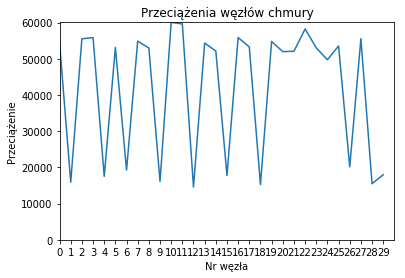

In [15]:
plt.plot(loadN)
plt.xlabel("Nr węzła")
plt.ylabel("Przeciążenie")
plt.axis([0, n, 0, max(loadN)])
plt.xticks(range(0,n))
plt.title("Przeciążenia węzłów chmury")
plt.show()

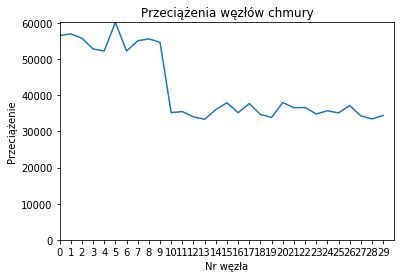

In [16]:
plt.plot(loadR1)
plt.xlabel("Nr węzła")
plt.ylabel("Przeciążenie")
plt.axis([0, n, 0, max(loadR1)])
plt.xticks(range(0,n))
plt.title("Przeciążenia węzłów chmury")
plt.show()